In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
sales= pd.read_csv("Superstore Sales Dataset.csv")

In [3]:
sales.head(200)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,CA-2015-140004,21/03/2015,25/03/2015,Standard Class,CB-12025,Cassandra Brandow,Consumer,United States,Hamilton,Ohio,45011.0,East,OFF-AR-10004685,Office Supplies,Art,Binney & Smith Crayola Metallic Colored Pencil...,7.4080
196,197,CA-2015-140004,21/03/2015,25/03/2015,Standard Class,CB-12025,Cassandra Brandow,Consumer,United States,Hamilton,Ohio,45011.0,East,OFF-AR-10004027,Office Supplies,Art,Binney & Smith inkTank Erasable Desk Highlight...,6.0480
197,198,CA-2018-107720,06/11/2018,13/11/2018,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Westfield,New Jersey,7090.0,East,OFF-ST-10001414,Office Supplies,Storage,Decoflex Hanging Personal Folder File,46.2600
198,199,US-2018-124303,06/07/2018,13/07/2018,Standard Class,FH-14365,Fred Hopkins,Corporate,United States,Philadelphia,Pennsylvania,19120.0,East,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",2.9460


In [4]:
sales.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2085,2086,CA-2017-140501,23/06/2017,28/06/2017,Standard Class,IM-15070,Irene Maddox,Consumer,United States,New York City,New York,10009.0,East,OFF-LA-10000248,Office Supplies,Labels,Avery 52,18.450
450,451,CA-2017-166674,01/04/2017,03/04/2017,Second Class,RB-19360,Raymond Buch,Consumer,United States,Auburn,New York,13021.0,East,OFF-AR-10003156,Office Supplies,Art,50 Colored Long Pencils,30.480
2015,2016,CA-2017-145905,18/09/2017,23/09/2017,Standard Class,AM-10705,Anne McFarland,Consumer,United States,Auburn,Alabama,36830.0,South,OFF-ST-10003716,Office Supplies,Storage,Tennsco Double-Tier Lockers,900.080
9178,9179,CA-2017-166618,14/11/2017,18/11/2017,Standard Class,DP-13000,Darren Powers,Consumer,United States,New York City,New York,10035.0,East,OFF-AR-10001725,Office Supplies,Art,Boston Home & Office Model 2000 Electric Penci...,23.650
158,159,CA-2017-114104,20/11/2017,24/11/2017,Standard Class,NP-18670,Nora Paige,Consumer,United States,Edmond,Oklahoma,73034.0,Central,OFF-LA-10002475,Office Supplies,Labels,Avery 519,14.620
8611,8612,CA-2018-123624,13/11/2018,17/11/2018,Second Class,SE-20110,Sanjit Engle,Consumer,United States,Oxnard,California,93030.0,West,TEC-AC-10000682,Technology,Accessories,Kensington K72356US Mouse-in-a-Box USB Desktop...,82.950
7722,7723,US-2018-138086,16/04/2018,20/04/2018,Standard Class,JO-15550,Jesus Ocampo,Home Office,United States,San Francisco,California,94109.0,West,OFF-AP-10000027,Office Supplies,Appliances,Hoover Commercial SteamVac,40.740
6647,6648,US-2017-127334,15/12/2017,21/12/2017,Standard Class,MP-18175,Mike Pelletier,Home Office,United States,Springfield,Oregon,97477.0,West,OFF-AP-10001205,Office Supplies,Appliances,Belkin 5 Outlet SurgeMaster Power Centers,87.168
6344,6345,CA-2016-146255,07/03/2016,10/03/2016,First Class,EM-14140,Eugene Moren,Home Office,United States,Newark,Delaware,19711.0,East,OFF-BI-10001765,Office Supplies,Binders,Wilson Jones Heavy-Duty Casebound Ring Binders...,69.280
1432,1433,CA-2015-120768,19/12/2015,21/12/2015,Second Class,IM-15070,Irene Maddox,Consumer,United States,Florence,Alabama,35630.0,South,OFF-SU-10004115,Office Supplies,Supplies,Acme Stainless Steel Office Snips,7.270


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
sales.dropna(subset=['Postal Code'],inplace=True)

In [7]:
sales.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [8]:
sales['Ship Date']= pd.to_datetime(sales['Ship Date'], format='%d/%m/%Y')

In [9]:
sales['Order Date']= pd.to_datetime(sales['Order Date'], format='%d/%m/%Y')

In [10]:
sales.pop('Row ID')

0          1
1          2
2          3
3          4
4          5
        ... 
9795    9796
9796    9797
9797    9798
9798    9799
9799    9800
Name: Row ID, Length: 9789, dtype: int64

In [11]:
sales.describe()

,Order Date,Ship Date,Postal Code,Sales
count,9789,9789,9789.000000,9789.000000
mean,2017-05-01 02:51:57.866993664,2017-05-05 01:56:03.898253056,55273.322403,230.116193
min,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000
25%,2016-05-23 00:00:00,2016-05-27 00:00:00,23223.000000,17.248000
50%,2017-06-26 00:00:00,2017-06-29 00:00:00,58103.000000,54.384000
75%,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.392000
max,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000
std,NaN,NaN,32041.223413,625.302079


{'whiskers': [<matplotlib.lines.Line2D at 0x28db4e0ea10>,
 'caps': [<matplotlib.lines.Line2D at 0x28db4d94450>,
 'boxes': [<matplotlib.lines.Line2D at 0x28db46c5490>],
 'medians': [<matplotlib.lines.Line2D at 0x28db4e1db50>],
 'fliers': [<matplotlib.lines.Line2D at 0x28db4e1e6d0>],
 'means': []}

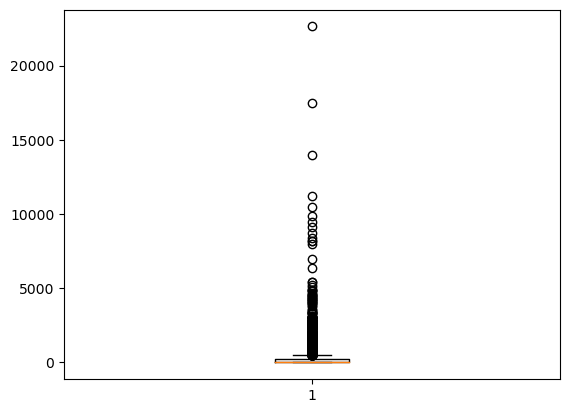

In [12]:
outliers=sales['Sales']
plt.boxplot(outliers)

In [13]:
q1=np.quantile(outliers,0.25)
q1

17.248

In [14]:
q3=np.quantile(outliers,0.75)
q3

210.392

In [15]:
iqr=q3-q1
iqr

193.144

In [16]:
lower=q1- 2*iqr
lower

-369.04

In [17]:
upper=q3+ 2*iqr
upper

596.6800000000001

In [18]:
filtered1_sales=outliers[((outliers<(q1-2*iqr))|(outliers>(q3+2*iqr)))]
filtered1_sales

1        731.9400
3        957.5775
7        907.1520
10      1706.1840
11       911.4240
          ...    
9759    1403.9200
9774    2177.5840
9781     673.5680
9787    1023.3320
9788     600.5580
Name: Sales, Length: 939, dtype: float64

In [19]:
filtered1_sales=outliers[~((outliers<(q1-2*iqr))|(outliers>(q3+2*iqr)))]
filtered1_sales

0       261.960
2        14.620
4        22.368
5        48.860
6         7.280
         ...   
9795      3.798
9796     10.368
9797    235.188
9798     26.376
9799     10.384
Name: Sales, Length: 8850, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x28db5945dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x28db5947750>,
 'boxes': [<matplotlib.lines.Line2D at 0x28db4e460d0>],
 'medians': [<matplotlib.lines.Line2D at 0x28db594ce50>],
 'fliers': [<matplotlib.lines.Line2D at 0x28db4e458d0>],
 'means': []}

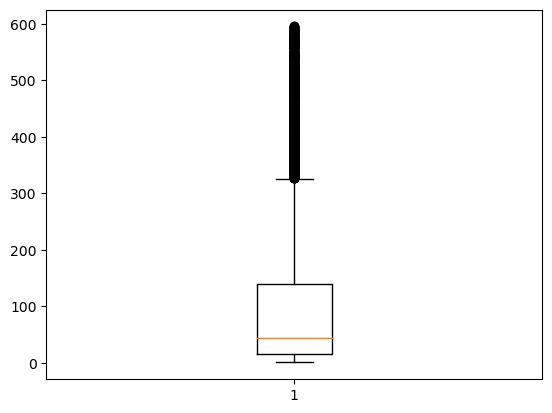

In [20]:
plt.boxplot(filtered1_sales)

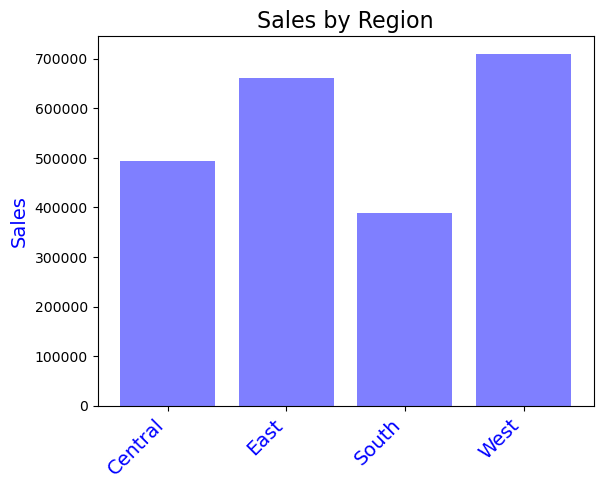

In [21]:
# Group by 'Country' and sum 'Sales'
sales_by_Region = sales.groupby('Region')['Sales'].sum()

# Create the bar chart
plt.bar(sales_by_Region.index, sales_by_Region.values, color="blue", alpha=0.5)

# Title
plt.title("Sales by Region", fontsize=16, color="black")

# X axis
plt.xticks(sales_by_Region.index, rotation=45, ha='right', fontsize=14, color="blue")  # Corrected line

# Y axis
plt.ylabel("Sales", fontsize=14, color="blue")

plt.show()

In [22]:
sales['Category']

0             Furniture
1             Furniture
2       Office Supplies
3             Furniture
4       Office Supplies
             ...       
9795    Office Supplies
9796    Office Supplies
9797         Technology
9798         Technology
9799         Technology
Name: Category, Length: 9789, dtype: object

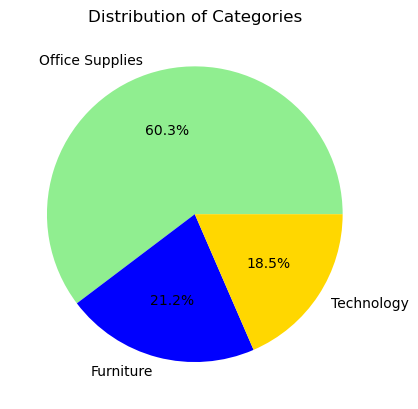

In [23]:
pie_data = sales.groupby('Category')['State'].count().sort_values(ascending=False)

colors = ['lightgreen', 'blue', 'gold']

plt.pie(pie_data, labels=pie_data.index, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.show()

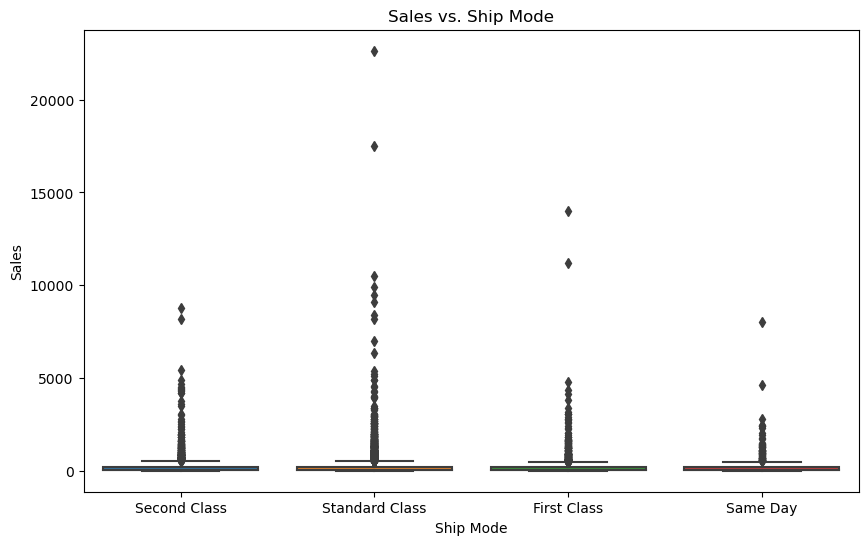

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ship Mode', y='Sales',data=sales)
plt.title('Sales vs. Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.show()

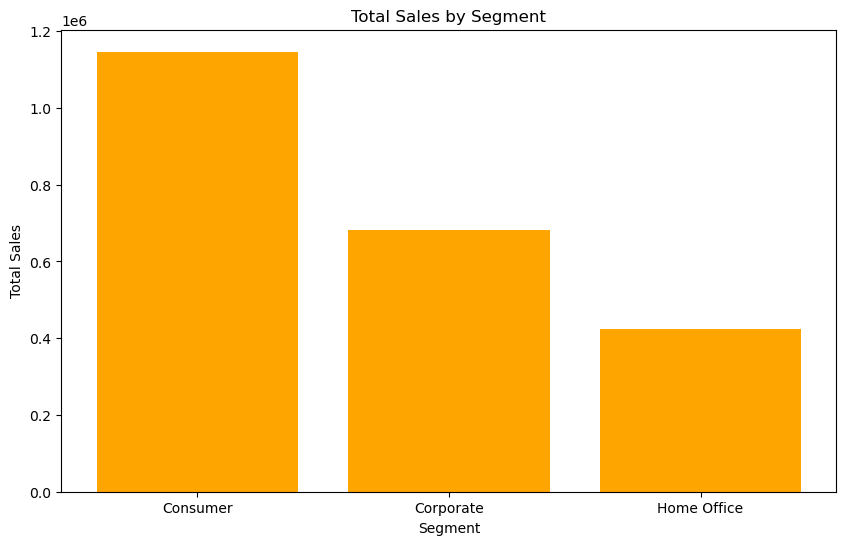

In [25]:
sales_by_segment = sales.groupby('Segment')['Sales'].sum()
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(sales_by_segment.index, sales_by_segment.values, color='orange')

# Add labels and title
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.title('Total Sales by Segment')

# Show the plot
plt.show()

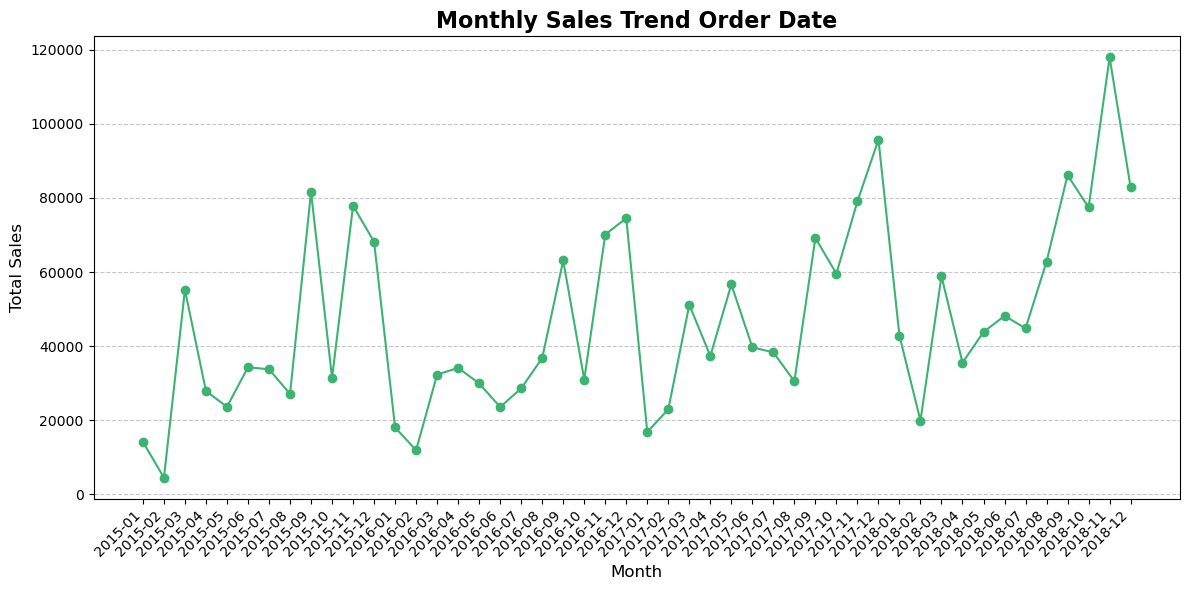

In [26]:
monthly_sales = sales.groupby(sales['Order Date'].dt.to_period('M'))['Sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-', color='mediumseagreen')

plt.title('Monthly Sales Trend Order Date', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Question 1: What is the average monthly sales?

In [27]:
monthly_sales = sales.groupby(sales['Order Date'].dt.to_period('M'))['Sales'].sum()
average_monthly_sales = monthly_sales.mean()

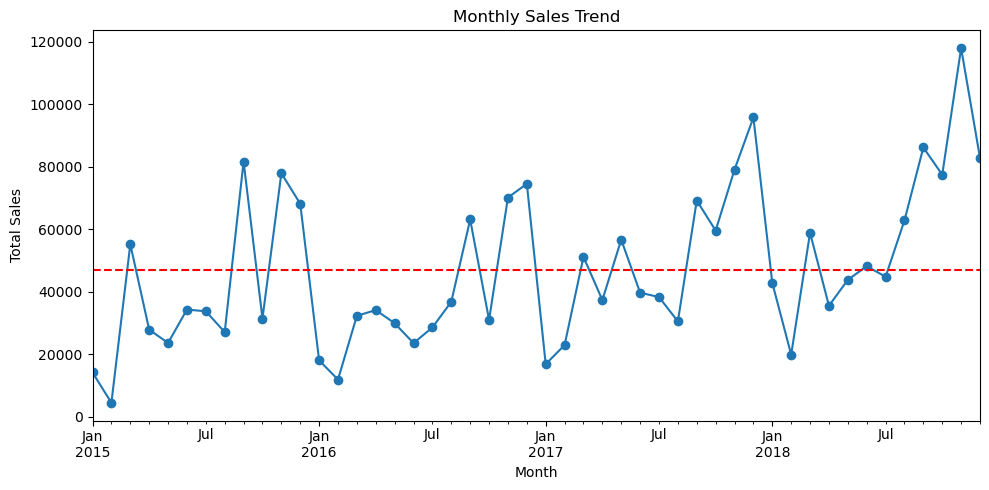

In [28]:
monthly_sales.plot(kind='line', marker='o', figsize=(10,5))
plt.axhline(average_monthly_sales, color='red', linestyle='--', label=f'Average: {average_monthly_sales:.2f}')

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

# Question 2: Which months generate the highest sales?

In [29]:
top_months = monthly_sales.sort_values(ascending=False).head(5)  
print("Top 5 Months by Sales: ", top_months)  

Top 5 Months by Sales:  Order Date
2018-11    117938.1550
2017-12     95739.1210
2018-09     86152.8880
2018-12     82825.3588
2015-09     81623.5268
Freq: M, Name: Sales, dtype: float64


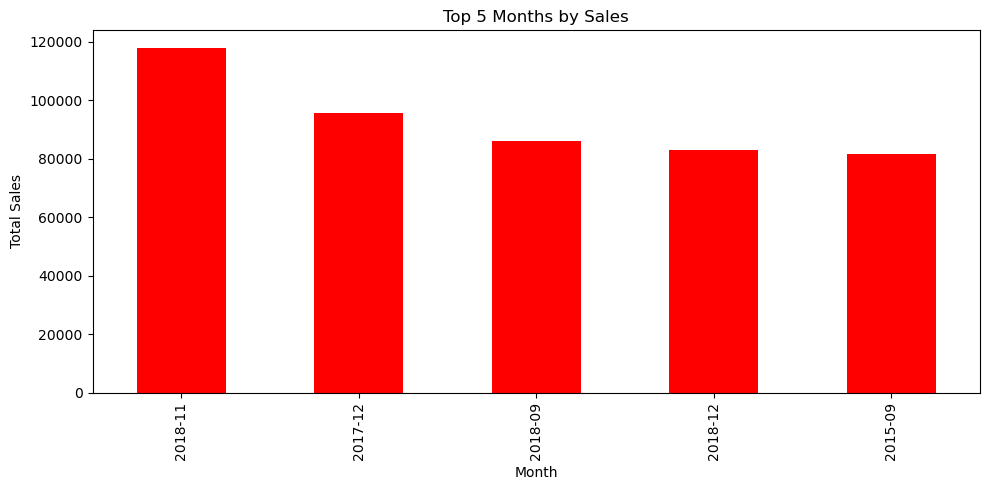

In [30]:
top_months.plot(kind='bar', color='red', figsize=(10, 5))
plt.title("Top 5 Months by Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")

plt.tight_layout()
plt.show()


# Question 4: Which product categories generate the highest revenue?

In [31]:
category_sales = sales.groupby('Category')['Sales'].sum().sort_values(ascending=False)  
print("Sales by Category:", category_sales)     

Sales by Category: Category
Technology         825856.1130
Furniture          723538.4757
Office Supplies    703212.8240
Name: Sales, dtype: float64


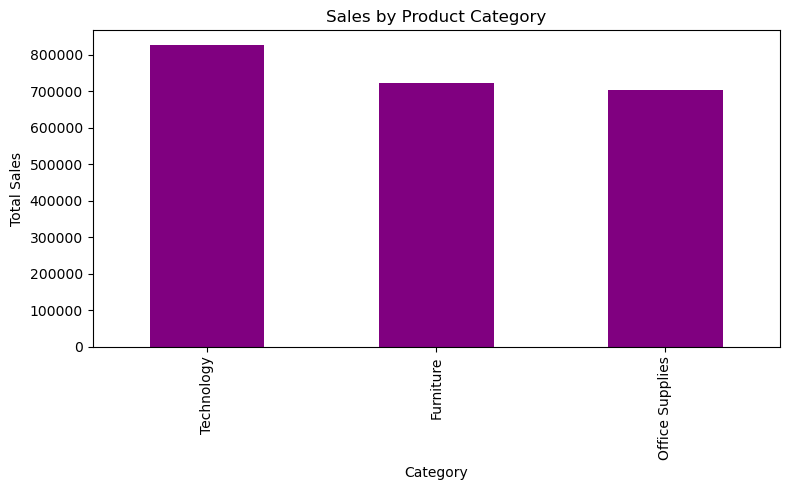

In [32]:
category_sales.plot(kind='bar', color='purple', figsize=(8, 5))
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")

plt.tight_layout()
plt.show()


# Question 5: What are the top and bottom performing sub-categories?


In [33]:
subcat_sales = sales.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)  
print("Top 5 Sub-Categories:", subcat_sales.head(5))                                 
print("Bottom 5 Sub-Categories:", subcat_sales.tail(5)) 

Top 5 Sub-Categories: Sub-Category
Phones     326487.698
Chairs     322107.531
Storage    217779.102
Tables     202810.628
Binders    200028.785
Name: Sales, dtype: float64
Bottom 5 Sub-Categories: Sub-Category
Supplies     46420.308
Art          26697.370
Envelopes    16126.006
Labels       12347.726
Fasteners     3001.960
Name: Sales, dtype: float64


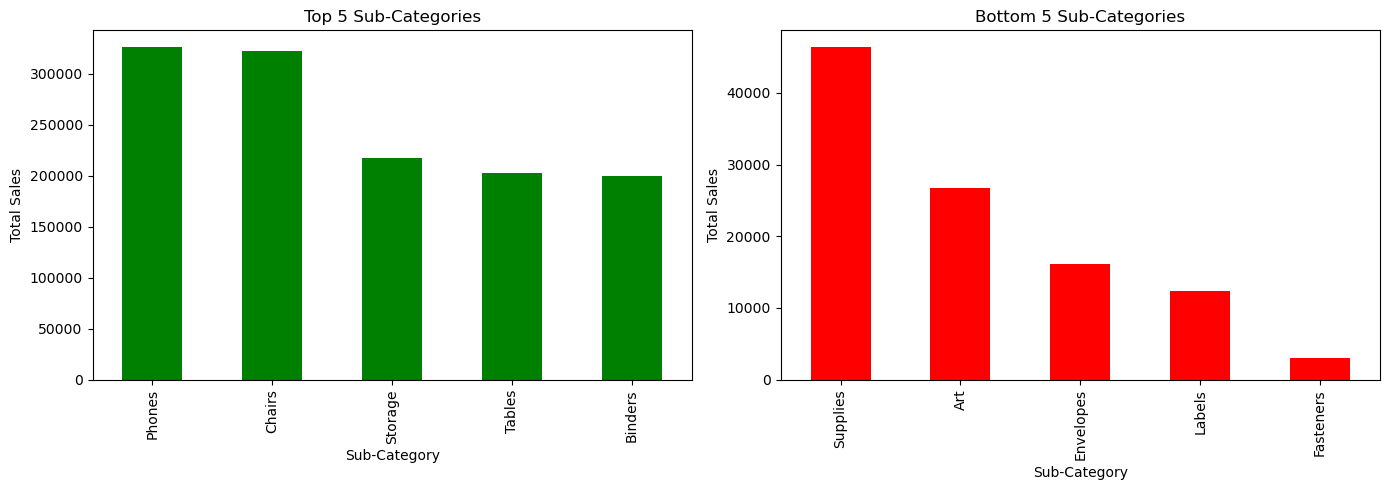

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
subcat_sales.head(5).plot(kind='bar', color='green', ax=axes[0])
axes[0].set_title("Top 5 Sub-Categories")
axes[0].set_xlabel("Sub-Category")
axes[0].set_ylabel("Total Sales")

subcat_sales.tail(5).plot(kind='bar', color='red', ax=axes[1])
axes[1].set_title("Bottom 5 Sub-Categories")
axes[1].set_xlabel("Sub-Category")
axes[1].set_ylabel("Total Sales")

plt.tight_layout()
plt.show()

# Question 6: Which products have the highest and lowest sales overall?

In [35]:
product_sales = sales.groupby('Product Name')['Sales'].sum().sort_values(ascending=False) 
print("Top 5 Products:")
print(product_sales.head(5))              
print("Bottom 5 Products:")
print(product_sales.tail(5))  

Top 5 Products:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64
Bottom 5 Products:
Product Name
Acme Serrated Blade Letter Opener                                   7.632
Grip Seal Envelopes                                                 7.072
Xerox 20                                                            6.480
Avery 5                                                             5.760
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    1.624
Name: Sales, dtype: float64


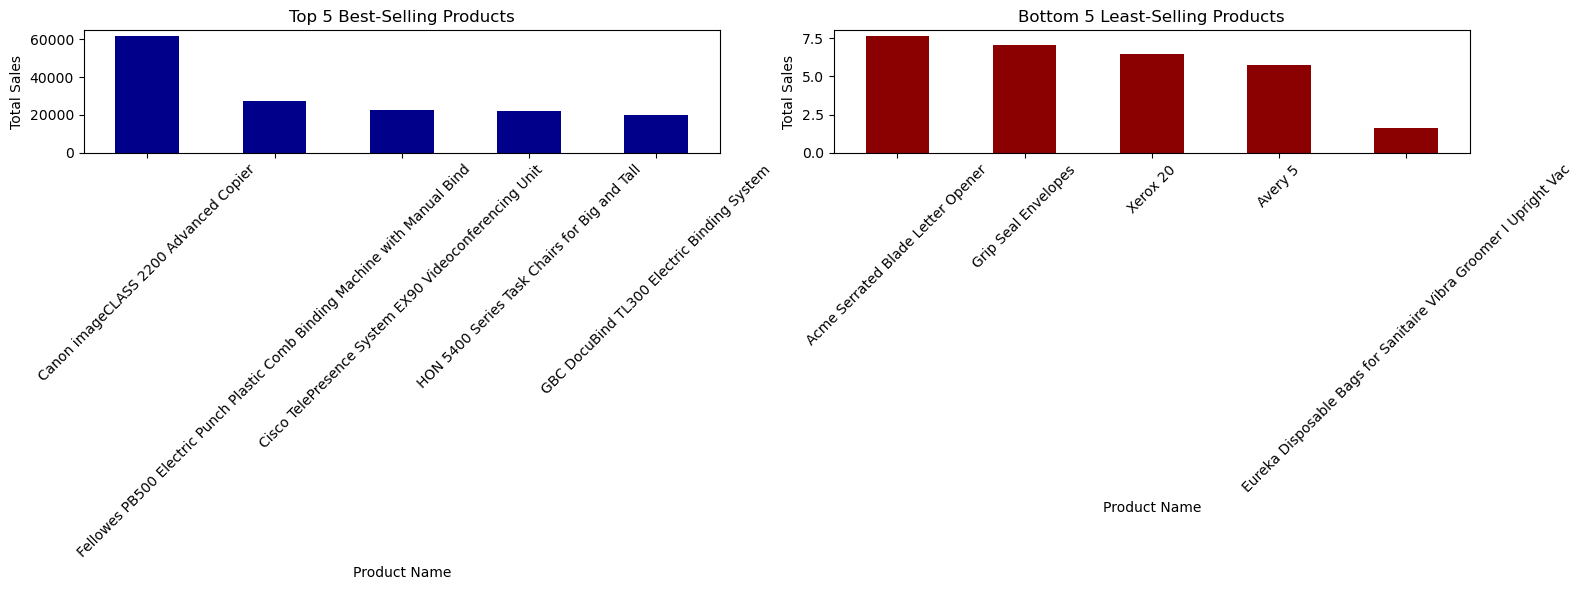

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
product_sales.head(5).plot(kind='bar', color='darkblue', ax=axes[0])
axes[0].set_title("Top 5 Best-Selling Products")
axes[0].set_xlabel("Product Name")
axes[0].set_ylabel("Total Sales")
axes[0].tick_params(axis='x', rotation=45)

product_sales.tail(5).plot(kind='bar', color='darkred', ax=axes[1])
axes[1].set_title("Bottom 5 Least-Selling Products")
axes[1].set_xlabel("Product Name")
axes[1].set_ylabel("Total Sales")
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

# Question 7: Which states or cities have the highest sales?

In [37]:
state_sales = sales.groupby('State')['Sales'].sum().sort_values(ascending=False)  
print("Top 5 States by Sales:", state_sales.head(5))

Top 5 States by Sales: State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Name: Sales, dtype: float64


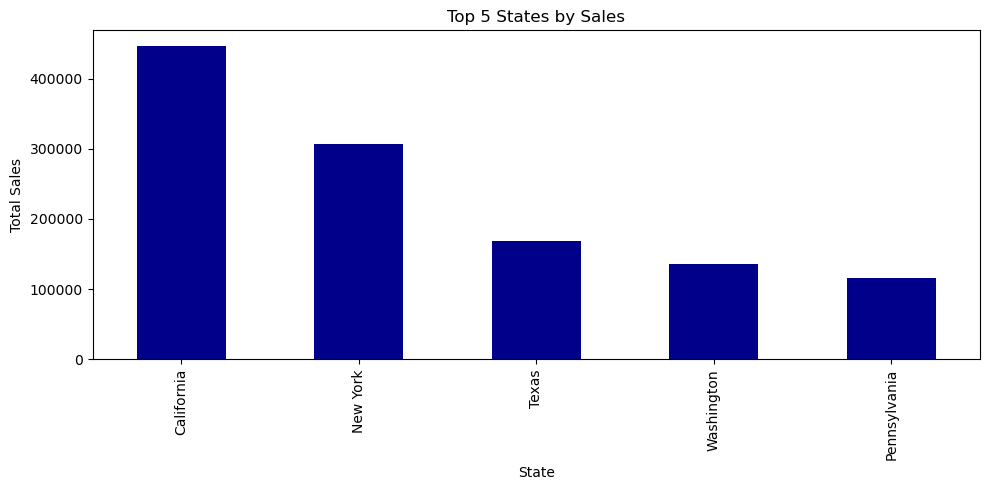

In [38]:
state_sales.head(5).plot(kind='bar', color='darkblue', figsize=(10, 5))
plt.title("Top 5 States by Sales")
plt.xlabel("State")
plt.ylabel("Total Sales")

plt.tight_layout()
plt.show()

In [39]:
city_sales = sales.groupby('City')['Sales'].sum().sort_values(ascending=False)   
print("Top 5 Cities by Sales:", city_sales.head(5)) 

Top 5 Cities by Sales: City
New York City    252462.547
Los Angeles      173420.181
Seattle          116106.322
San Francisco    109041.120
Philadelphia     108841.749
Name: Sales, dtype: float64


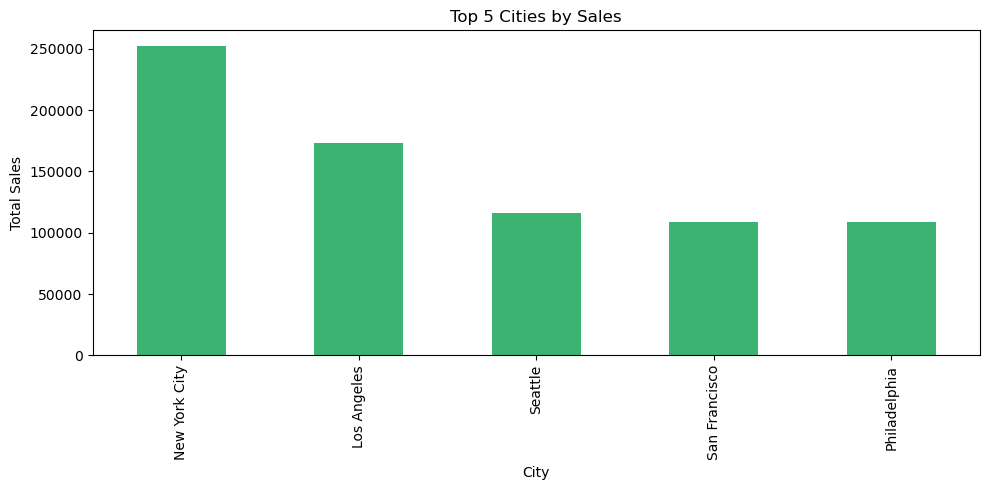

In [40]:
# top 5 cities by sales
city_sales.head(5).plot(kind='bar', color='mediumseagreen', figsize=(10, 5))
plt.title("Top 5 Cities by Sales")
plt.xlabel("City")
plt.ylabel("Total Sales")

plt.tight_layout()
plt.show()

# Question 9: Do sales vary significantly across different regions (South, West, Central, East)?

In [41]:
region_variation = sales.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("Sales by Region:", region_variation)

Sales by Region: Region
West       710219.6845
East       660589.3560
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


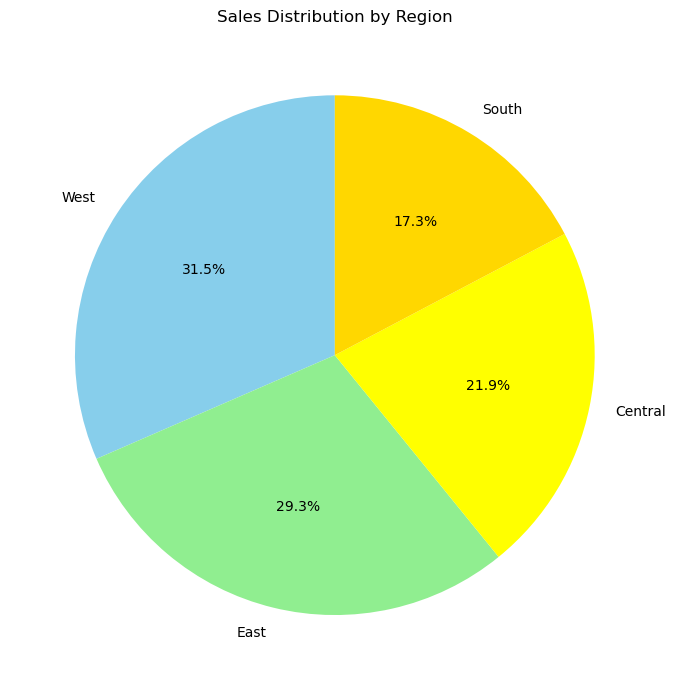

In [42]:
region_variation.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7), startangle=90, colors=['skyblue', 'lightgreen', 'yellow', 'gold'])
plt.title("Sales Distribution by Region")
plt.ylabel("")  

plt.tight_layout()
plt.show()


# Question 10: Which customer segment (Consumer, Corporate, Home Office) drives the most sales?


In [43]:
segment_sales = sales.groupby('Segment')['Sales'].sum().sort_values(ascending=False)  
print("Sales by Segment:", segment_sales) 

Sales by Segment: Segment
Consumer       1.146708e+06
Corporate      6.822118e+05
Home Office    4.236874e+05
Name: Sales, dtype: float64


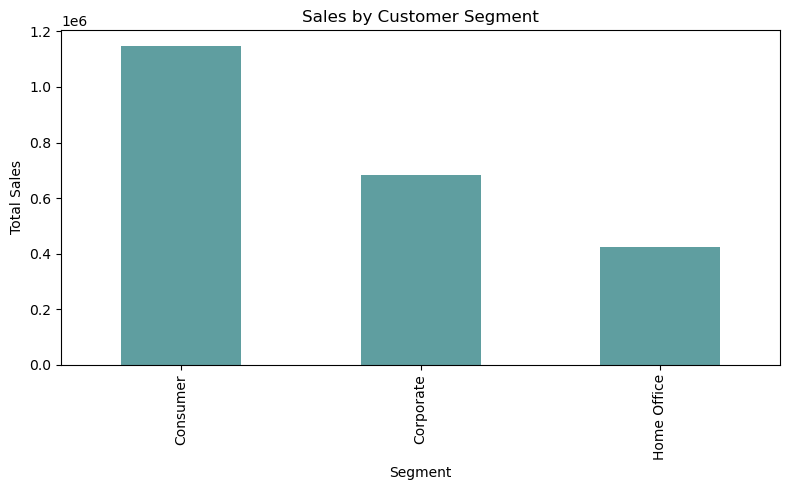

In [44]:
segment_sales.plot(kind='bar', color='cadetblue', figsize=(8, 5))
plt.title("Sales by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Total Sales")

plt.tight_layout()
plt.show()

# Question 11: What is the impact of shipping mode on sales volume?


In [45]:
shipping_sales = sales.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False) 
print("Sales by Shipping Mode:", shipping_sales) 

Sales by Shipping Mode: Ship Mode
Standard Class    1.332617e+06
Second Class      4.491990e+05
First Class       3.455723e+05
Same Day          1.252190e+05
Name: Sales, dtype: float64


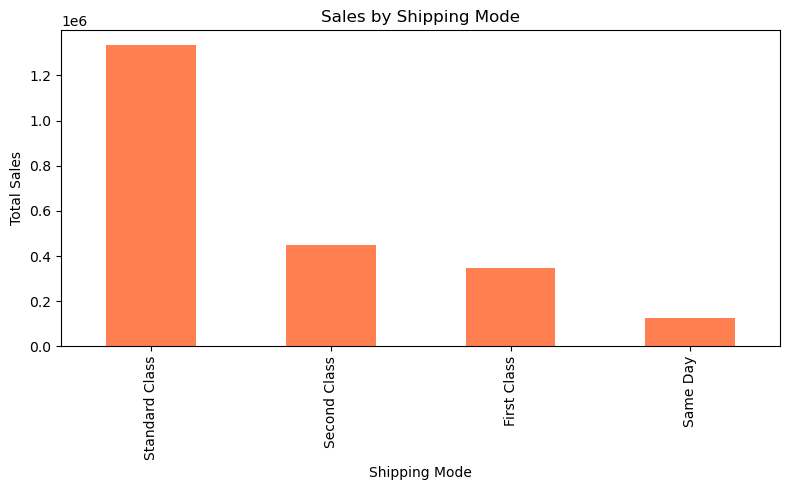

In [46]:
shipping_sales.plot(kind='bar', color='coral', figsize=(8, 5))
plt.title("Sales by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Total Sales")

plt.tight_layout()
plt.show()


# 1. How will sales trend over the next 6 months?

In [47]:
#Extract date features
sales['Order Year'] = sales['Order Date'].dt.year 
sales['Order Month'] = sales['Order Date'].dt.month 
sales['Order Day'] = sales['Order Date'].dt.day 
sales['Order DayOfWeek'] = sales['Order Date'].dt.dayofweek 
sales['Shipping Days'] = (sales['Ship Date'] - sales['Order Date']).dt.days

In [48]:
# For visualization purposes, I'll set a consistent style
plt.style.use('seaborn-v0_8-whitegrid')
colors = sns.color_palette("viridis", 10)

In [55]:

# Monthly aggregation for time series modeling
monthly_sales = sales.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()
monthly_sales.set_index('Order Date', inplace=True)

# ARIMA model for forecasting
# Find the last date in our dataset
last_date = monthly_sales.index[-1]
# Create a date range for the next 6 months
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=6, freq='M')

# Fit ARIMA model - choosing parameters based on time series characteristics
model = ARIMA(monthly_sales['Sales'], order=(6, 1, 1))
model_fit = model.fit()

# Generate forecasts
forecast = model_fit.forecast(steps=6)
forecast_df = pd.DataFrame({'Forecast': forecast, 'Date': future_dates})
forecast_df.set_index('Date', inplace=True)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


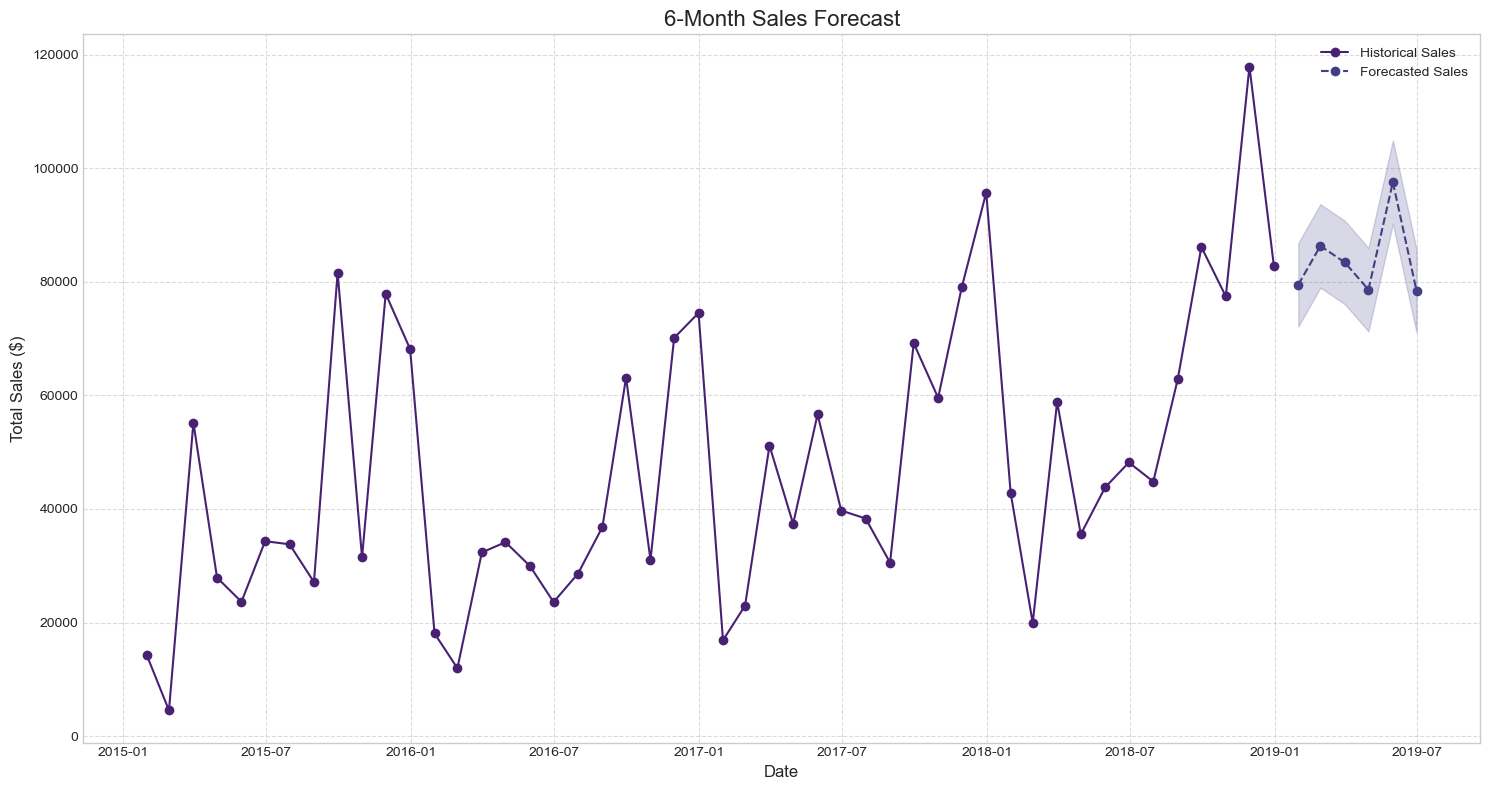

In [56]:
# Plot the forecasts
plt.figure(figsize=(15, 8))
plt.plot(monthly_sales.index, monthly_sales['Sales'], label='Historical Sales', marker='o', linestyle='-', color=colors[0])
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Sales', marker='o', linestyle='--', color=colors[1])
plt.fill_between(forecast_df.index, 
                 forecast_df['Forecast'] - forecast_df['Forecast'].std(), 
                 forecast_df['Forecast'] + forecast_df['Forecast'].std(),
                 color=colors[1], alpha=0.2)
plt.title('6-Month Sales Forecast', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. How does region influence sales performance and future growth?

In [51]:
# Regional analysis and forecasting

region_monthly = sales.groupby(['Order Year', 'Order Month', 'Region'])['Sales'].sum().reset_index()
region_monthly['YearMonth'] = region_monthly['Order Year'].astype(str) + '-' + region_monthly['Order Month'].astype(str).str.zfill(2)
region_monthly['YearMonth'] = pd.to_datetime(region_monthly['YearMonth'], format='%Y-%m')
region_monthly = region_monthly.sort_values('YearMonth')

# Regional growth rate calculation and forecasting
def forecast_region_growth(region):
    region_data = region_monthly[region_monthly['Region'] == region]
    if len(region_data) > 6:
        # Calculate growth rate
        region_data = region_data.sort_values('YearMonth')
        recent_months = 6
        
        if len(region_data) > recent_months * 2:
            recent_sales = region_data['Sales'].iloc[-recent_months:].sum()
            previous_sales = region_data['Sales'].iloc[-recent_months*2:-recent_months].sum()
            growth_rate = ((recent_sales / previous_sales) - 1) * 100
        else:
            growth_rate = 0
            
        # Simple linear forecast
        region_data['numeric_date'] = (region_data['YearMonth'] - region_data['YearMonth'].min()).dt.days
        
        X = region_data['numeric_date'].values.reshape(-1, 1)
        y = region_data['Sales'].values
        
        model = LinearRegression()
        model.fit(X, y)
        
        # Calculate projected growth
        slope = model.coef_[0]
        current_value = region_data['Sales'].iloc[-1]
        projected_value = current_value + (slope * 180)  # Roughly 6 months
        projected_growth = ((projected_value / current_value) - 1) * 100
            
        return {
            'region': region,
            'historical_growth_rate': growth_rate,
            'projected_growth_rate': projected_growth,
            'slope': slope
        }
    return None

# Forecast growth for each region
region_forecasts = []
for region in sales['Region'].unique():
    forecast = forecast_region_growth(region)
    if forecast:
        region_forecasts.append(forecast)



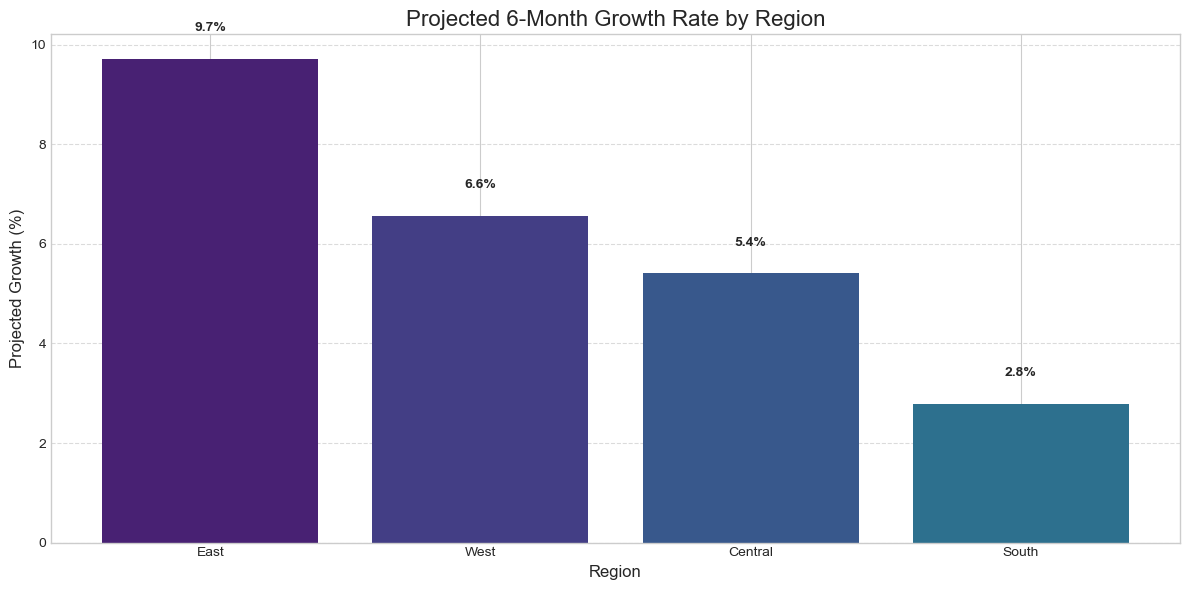

In [52]:
# Visualize regional growth projections
region_forecast_df = pd.DataFrame(region_forecasts)
region_forecast_df = region_forecast_df.sort_values('projected_growth_rate', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(region_forecast_df['region'], region_forecast_df['projected_growth_rate'], color=colors[:len(region_forecast_df)])
plt.title('Projected 6-Month Growth Rate by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Projected Growth (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 3. Which customer segments should we focus on for growth?

In [53]:
# Segment analysis and forecasting

segment_monthly = sales.groupby(['Order Year', 'Order Month', 'Segment'])['Sales'].sum().reset_index()
segment_monthly['YearMonth'] = segment_monthly['Order Year'].astype(str) + '-' + segment_monthly['Order Month'].astype(str).str.zfill(2)
segment_monthly['YearMonth'] = pd.to_datetime(segment_monthly['YearMonth'], format='%Y-%m')
segment_monthly = segment_monthly.sort_values('YearMonth')

# Forecast segment growth using the same approach as for regions
def forecast_segment_growth(segment):
    segment_data = segment_monthly[segment_monthly['Segment'] == segment]
    if len(segment_data) > 6:
        # Simple linear forecast
        segment_data['numeric_date'] = (segment_data['YearMonth'] - segment_data['YearMonth'].min()).dt.days
        
        X = segment_data['numeric_date'].values.reshape(-1, 1)
        y = segment_data['Sales'].values
        
        model = LinearRegression()
        model.fit(X, y)
        
        # Calculate projected growth
        slope = model.coef_[0]
        current_value = segment_data['Sales'].iloc[-1]
        projected_value = current_value + (slope * 180)  # Roughly 6 months
        projected_growth = ((projected_value / current_value) - 1) * 100
            
        return {
            'segment': segment,
            'current_value': current_value,
            'projected_value': projected_value,
            'projected_growth_rate': projected_growth,
            'slope': slope
        }
    return None

# Forecast growth for each segment
segment_forecasts = []
for segment in sales['Segment'].unique():
    forecast = forecast_segment_growth(segment)
    if forecast:
        segment_forecasts.append(forecast)



C:\Users\Dell\AppData\Local\Temp\ipykernel_24996\3482047827.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['numeric_date'] = (segment_data['YearMonth'] - segment_data['YearMonth'].min()).dt.days
C:\Users\Dell\AppData\Local\Temp\ipykernel_24996\3482047827.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['numeric_date'] = (segment_data['YearMonth'] - segment_data['YearMonth'].min()).dt.days
C:\Users\Dell\AppData\Local\Temp\ipykernel_24996\3482047827.py:13: SettingWithCopyWa

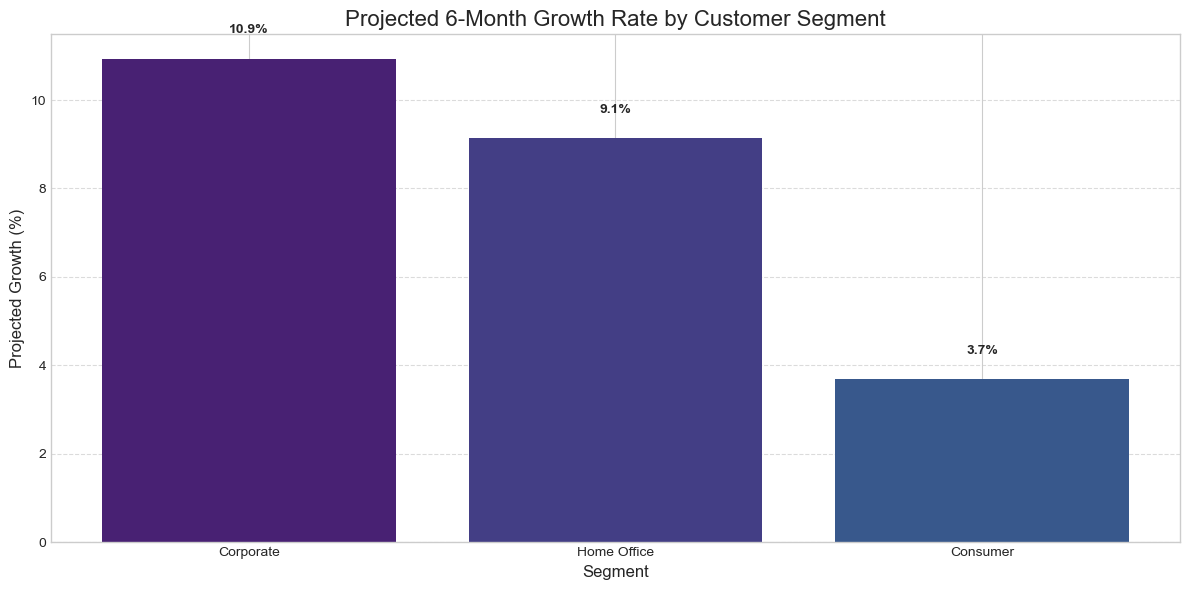

In [54]:
# Visualize segment growth projections
segment_forecast_df = pd.DataFrame(segment_forecasts)
segment_forecast_df = segment_forecast_df.sort_values('projected_growth_rate', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(segment_forecast_df['segment'], segment_forecast_df['projected_growth_rate'], color=colors[:len(segment_forecast_df)])
plt.title('Projected 6-Month Growth Rate by Customer Segment', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Projected Growth (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()
